In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
%matplotlib inline

In [9]:
df = pd.read_csv("YearPredictionMSD.csv",header=None, names = ["column_"+str(i) for i in range(91)])

In [10]:
df.head()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_81,column_82,column_83,column_84,column_85,column_86,column_87,column_88,column_89,column_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [11]:
df['column_0'] = df.column_0.apply(lambda year : year-(year%10))

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Samples in the dataset/release decade')

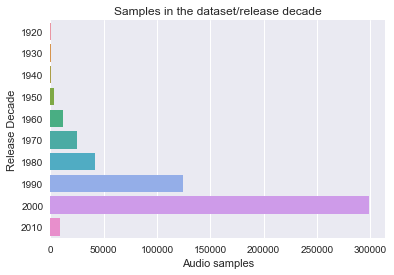

In [12]:
sns.countplot(y="column_0", data=df)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [13]:
df.iloc[:,1:].describe()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_81,column_82,column_83,column_84,column_85,column_86,column_87,column_88,column_89,column_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,-2.444850,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,1.783520,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,6.147220,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


#### Scaling

In [14]:
#scaling features using min, max scaler
df.iloc[:,1:] = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
df.iloc[:,1:].describe()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_81,column_82,column_83,column_84,column_85,column_86,column_87,column_88,column_89,column_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


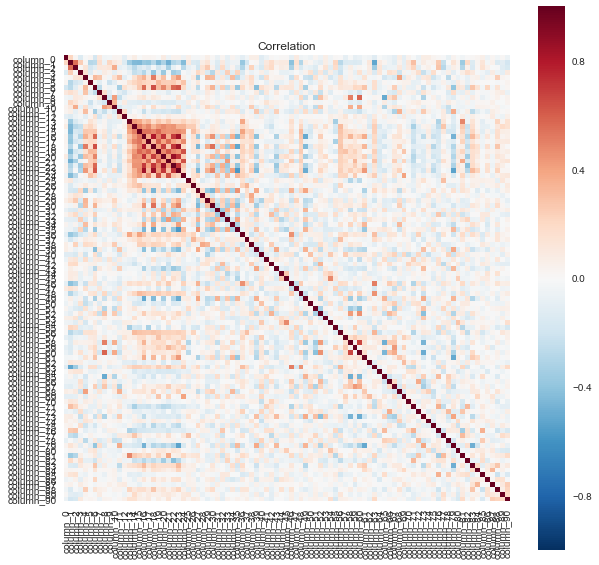

In [15]:
# Correlation between the release decade and features
corr = df.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation")
sns.heatmap(corr, square=True)
plt.show()

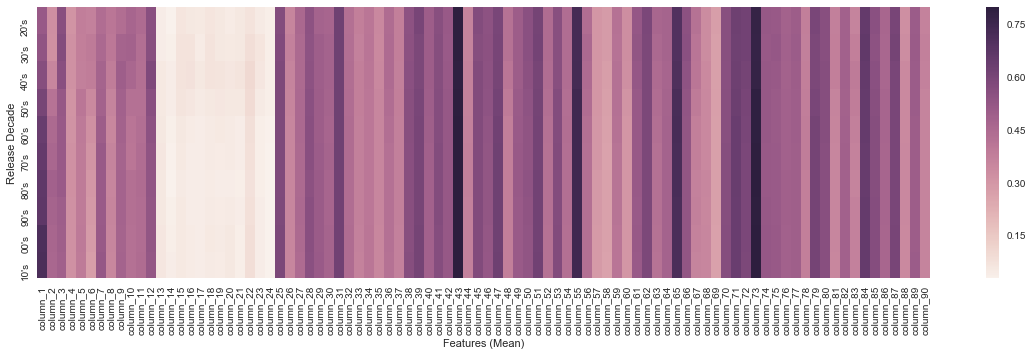

In [16]:
# How do features differ by release decade?
columns = df.groupby(['column_0']).mean().columns
labels = ["{:02d}'s".format(l%100) for l in sorted(df.column_0.unique())]
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.groupby(['column_0']).mean().iloc[:,:], yticklabels=labels)
plt.ylabel("Release Decade")
plt.xlabel("Features (Mean)")
plt.show()

High correlation between the elements in column_13 and column_24

#### Applying PCA

In [17]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
print("X ", X.shape, ", y ", y.shape)

X  (515345, 90) , y  (515345,)


In [18]:
pca = PCA(X.shape[1]).fit(X)
X_pca = pca.transform(X)

In [19]:
principal_components = []
samples, features = X_pca.shape
for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Release Decade"]    
df_pca = pd.DataFrame(np.append(X_pca, y.reshape(samples,1), axis=1), columns=cols)
df_pca["Release Decade"] = df_pca["Release Decade"].astype(int)
print("df_pca.shape = ",df_pca.shape)

df_pca.shape =  (515345, 91)


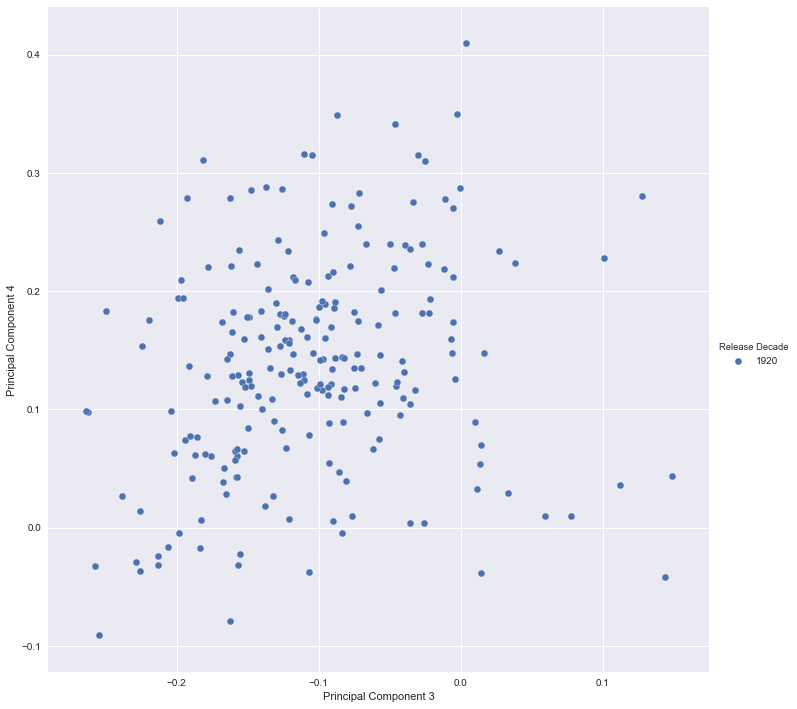

In [20]:
sns.pairplot(df_pca[df_pca['Release Decade']==1920], hue="Release Decade",x_vars="Principal Component 3",y_vars="Principal Component 4", size=10)

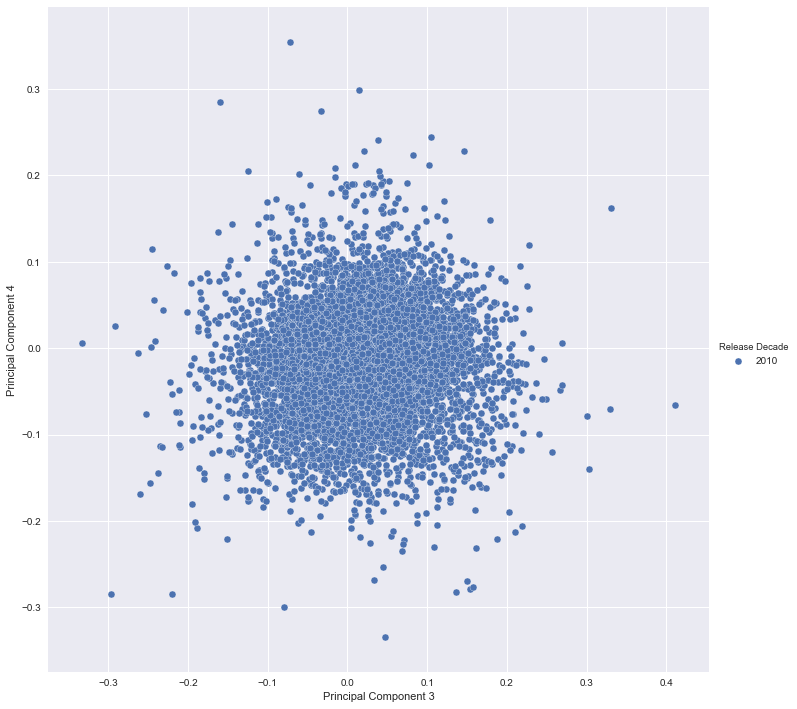

In [21]:
sns.pairplot(df_pca[df_pca['Release Decade']==2010], hue="Release Decade",x_vars="Principal Component 3",y_vars="Principal Component 4", size=10)

#### Splitting the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size = 0.2, random_state = 0,stratify =  df_pca.iloc[:,-1])

In [23]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(412276, 90)
(103069, 90)
(412276,)
(103069,)


(None, None, None, None)

In [24]:
# saving the data for future use
df_pca.to_csv('pca_data.csv')

#### Classifier

In [25]:
# define early stopping callback
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

In [26]:
from keras.callbacks import ModelCheckpoint
modelcheck = ModelCheckpoint('C:\\Users\\Lenovo\\Desktop\\ML\\Data Mining and Decision Models\\Decision Models Assignment\\checkpoints\\classifier_checkpoint.hdf5',monitor='val_acc',verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [27]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),histogram_freq=1, batch_size=32, write_graph=True, write_grads=True,write_images=True)

In [28]:
#python -m tensorboard.main --logdir=logs/

In [29]:
callbacks_list=[tensorboard,earlystop,modelcheck]

In [30]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [31]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 60, activation = 'relu', input_dim = df_pca.shape[1]-1))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 30,  activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 30, activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units =len(df_pca['Release Decade'].unique()),  activation = 'softmax'))#88

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                5460      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total para

In [ ]:
classifier.fit(X_train, pd.get_dummies(y_train).values, batch_size = 32, epochs = 100,callbacks=callbacks_list,validation_data=(X_test, pd.get_dummies(y_test).values))

#### Cross validation

In [47]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0 )

In [48]:
X,y = df_pca.values[:,:-1], df_pca.values[:,-1]

In [79]:
cvscores = []
for train, test in kfold.split(X,y):
    # create model
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 60, activation = 'relu', input_dim = df_pca.shape[1]-1))
    classifier.add(Dropout(0.2))
    # Adding the second hidden layer
    classifier.add(Dense(units = 30,  activation = 'relu'))
    classifier.add(Dropout(0.2))
    # Adding the second hidden layer
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dropout(0.2))
    # Adding the output layer
    classifier.add(Dense(units =len(df_pca['Release Decade'].unique()),  activation = 'softmax'))#88
    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    # Fit the model
    classifier.fit(X[train], pd.get_dummies(y[train]), epochs=10, batch_size=32, verbose=0)
    # evaluate the model
    scores = classifier.evaluate(X[test],  pd.get_dummies(y[test]), verbose=0)
    print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

acc: 64.99%
acc: 65.15%
acc: 65.12%
acc: 65.09%
acc: 65.31%
acc: 65.22%
acc: 65.46%
acc: 65.05%
acc: 65.23%
acc: 65.12%


In [81]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

65.17% (+/- 0.13%)
